In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

path = "C:/Users/paulg/Documents/GitHub/IS-460/Python/Data Visualization Data Files/"

filename = path + 'Baltimore_Traffic_Citations.csv'

df = pd.read_csv(filename, nrows=5)
print(df.columns)

Index(['Citation', 'Tag', 'ExpMM', 'ExpYY', 'State', 'Make', 'Address',
       'ViolCode', 'Description', 'ViolFine', 'ViolDate', 'Balance',
       'PenaltyDate', 'OpenFine', 'OpenPenalty', 'ImportDate'],
      dtype='object')


In [2]:
df = pd.read_csv(filename, usecols = ['Tag', 'ViolFine', 'ViolDate'])

In [3]:
df

,Tag,ViolFine,ViolDate
0,5CB9762,40.0,06/17/2019 06:14:00 PM
1,4DC2945,40.0,06/18/2019 12:12:00 PM
2,9CL8104,40.0,06/18/2019 12:17:00 PM
3,S14LDS,40.0,06/19/2019 07:08:00 AM
4,9BN6360,40.0,06/19/2019 01:12:00 PM
...,...,...,...
4159462,T337554,40.0,10/27/2017 07:25:00 PM
4159463,2CA0214,40.0,10/27/2017 07:26:00 PM
4159464,3755Z9,40.0,10/27/2017 07:26:00 PM
4159465,8230310,40.0,10/27/2017 07:26:00 PM


In [4]:
df.dtypes

Tag          object
ViolFine    float64
ViolDate     object
dtype: object

In [5]:
df.isna().sum()

Tag         305
ViolFine      0
ViolDate      0
dtype: int64

In [6]:
df.Tag.isna().sum()

305

In [7]:
df.Tag.value_counts()

NO TAGST    880
NOTAGS T    843
5BF6174     264
7FLX59      212
3CM9052     202
           ... 
CXKW78        1
6DS9429       1
04818LM       1
81043CH       1
LDY101        1
Name: Tag, Length: 1458960, dtype: int64

In [8]:
df.Tag.fillna("Not Available", inplace = True)

In [9]:
df.Tag.value_counts()

NO TAGST         880
NOTAGS T         843
Not Available    305
5BF6174          264
7FLX59           212
                ... 
6DS9429            1
04818LM            1
81043CH            1
5FYL78             1
LDY101             1
Name: Tag, Length: 1458961, dtype: int64

In [11]:
df['ViolDate'] = pd.to_datetime(df['ViolDate'], format = '%m/%d/%Y %I:%M:%S %p')

In [12]:
df

,Tag,ViolFine,ViolDate
0,5CB9762,40.0,2019-06-17 18:14:00
1,4DC2945,40.0,2019-06-18 12:12:00
2,9CL8104,40.0,2019-06-18 12:17:00
3,S14LDS,40.0,2019-06-19 07:08:00
4,9BN6360,40.0,2019-06-19 13:12:00
...,...,...,...
4159462,T337554,40.0,2017-10-27 19:25:00
4159463,2CA0214,40.0,2017-10-27 19:26:00
4159464,3755Z9,40.0,2017-10-27 19:26:00
4159465,8230310,40.0,2017-10-27 19:26:00


In [13]:
df.dtypes

Tag                 object
ViolFine           float64
ViolDate    datetime64[ns]
dtype: object

In [14]:
df['Hour'] = df.ViolDate.dt.hour
df['Day'] = df.ViolDate.dt.day
df['Month'] = df.ViolDate.dt.month
df['Year'] = df.ViolDate.dt.year
df['WeekDay'] = df.ViolDate.dt.strftime('%a')
df['MonthName'] = df.ViolDate.dt.strftime('%b')

In [15]:
df

,Tag,ViolFine,ViolDate,Hour,Day,Month,Year,WeekDay,MonthName
0,5CB9762,40.0,2019-06-17 18:14:00,18,17,6,2019,Mon,Jun
1,4DC2945,40.0,2019-06-18 12:12:00,12,18,6,2019,Tue,Jun
2,9CL8104,40.0,2019-06-18 12:17:00,12,18,6,2019,Tue,Jun
3,S14LDS,40.0,2019-06-19 07:08:00,7,19,6,2019,Wed,Jun
4,9BN6360,40.0,2019-06-19 13:12:00,13,19,6,2019,Wed,Jun
...,...,...,...,...,...,...,...,...,...
4159462,T337554,40.0,2017-10-27 19:25:00,19,27,10,2017,Fri,Oct
4159463,2CA0214,40.0,2017-10-27 19:26:00,19,27,10,2017,Fri,Oct
4159464,3755Z9,40.0,2017-10-27 19:26:00,19,27,10,2017,Fri,Oct
4159465,8230310,40.0,2017-10-27 19:26:00,19,27,10,2017,Fri,Oct


In [16]:
x = df.groupby(['Tag']).agg({'Tag': ['count'], 'ViolFine':['sum','mean']}).reset_index()

In [17]:
x

Tag       ViolFine      
                  count      sum  mean
0               0     1     32.0  32.0
1         0 HUNNY     2     80.0  40.0
2          0 JEFF     6    240.0  40.0
3         0 LARUE     1     32.0  32.0
4        0 OL0049     1     32.0  32.0
...           ...   ...      ...   ...
1458956    ZZZ20G     1     52.0  52.0
1458957   ZZZ3622     2     80.0  40.0
1458958    ZZZ400     2     80.0  40.0
1458959    ZZZ574     2     64.0  32.0
1458960    ZZZ80H     1     32.0  32.0

[1458961 rows x 4 columns]

In [18]:
x.columns = ['Tag','Count','TotalFines','AverFine']

In [19]:
x

,Tag,Count,TotalFines,AverFine
0,0,1,32.0,32.0
1,0 HUNNY,2,80.0,40.0
2,0 JEFF,6,240.0,40.0
3,0 LARUE,1,32.0,32.0
4,0 OL0049,1,32.0,32.0
...,...,...,...,...
1458956,ZZZ20G,1,52.0,52.0
1458957,ZZZ3622,2,80.0,40.0
1458958,ZZZ400,2,80.0,40.0
1458959,ZZZ574,2,64.0,32.0


In [20]:
x = x.sort_values('Count', ascending = False)

In [21]:
x

,Tag,Count,TotalFines,AverFine
1331341,NO TAGST,880,36260.0,41.204545
1331427,NOTAGS T,843,37156.0,44.075919
1332257,Not Available,305,11095.0,36.377049
586130,5BF6174,264,9587.0,36.314394
907502,7FLX59,212,7040.0,33.207547
...,...,...,...,...
655080,5DS3314,1,32.0,32.000000
655085,5DS3343,1,32.0,32.000000
655086,5DS3344,1,32.0,32.000000
655090,5DS3350,1,40.0,40.000000


In [22]:
PossibleBadTags = x['Tag'].str.contains('TAG|Not Available|Tag')
PossibleBadTags

1331341     True
1331427     True
1332257     True
586130     False
907502     False
           ...  
655080     False
655085     False
655086     False
655090     False
1458960    False
Name: Tag, Length: 1458961, dtype: bool

In [23]:
PossibleBadRows = x [x['Tag'].str.contains('TAG|Not Available|Tag')]
PossibleBadRows

,Tag,Count,TotalFines,AverFine
1331341,NO TAGST,880,36260.0,41.204545
1331427,NOTAGS T,843,37156.0,44.075919
1332257,Not Available,305,11095.0,36.377049
1331429,NOTAGSDI,138,4781.0,34.644928
1328824,N0TAGS,68,2216.0,32.588235
...,...,...,...,...
1388637,TAGNO,1,32.0,32.000000
1388635,TAG944,1,40.0,40.000000
1388633,TAG NO,1,32.0,32.000000
1389172,TEMP TAG,1,52.0,52.000000


In [24]:
PossibleBadRows.Tag.values

array(['NO TAGST', 'NOTAGS T', 'Not Available', 'NOTAGSDI', 'N0TAGS',
       'NOTAG  T', 'NO TAG T', 'NOT TAGS', 'NO  TAG', 'NO  TAGS',
       'NO TAG D', 'X NO TAG', 'N0 TAGS', 'XNO TAG', 'SCRTAGT', 'NO TAGZ',
       'N0 TAG', 'NOTAGD', 'NOTAGA', 'NOTAGGS', 'NOT TAG', 'TAG1',
       'NO TAGD', 'NO TAGA', 'NO TAG X', 'NO TAGSS', 'NO   TAG', 'NOTAGG',
       'TAGDAT', 'XXNO TAG', 'TAG DAT', 'NT TAG', 'NO TAGX', 'NO TAGHS',
       'NO TAGGS', 'NO TAGG', 'NOTTAGS', 'LITAG8R', 'N0TAG', 'B NOTAGS',
       'V1NTAGE', 'WTTAGW1', 'DATAGUY', 'NIOTAGS', 'NJTAGS', 'NJOTAGS',
       'NOATAG', 'NO TTAG', 'NOGTAG', 'NO STAGS', 'NO TAG 1', 'NO TAG1B',
       'NO TAG5', 'NO TAG N', 'NO TAGBS', 'NO TAGSX', 'NO TAGSN',
       'NO TAGC', 'NO TAGH', 'NO TAGSC', 'NO TAGL', 'NO TAGS9', 'NOTAG5',
       'NOTAG XX', 'NOO TAG', 'NOT  TAG', 'NOO TAGS', 'NI TAGST',
       'NI TAGS', 'NY TAGS', 'NOTAGLS', 'NOTAGS X', 'NOTAGT', 'NOTAGXX',
       'NOTAGSS', 'NTTAGS', 'NTAGS', 'TAG ART', 'TAGNO', 'TAG944',
       'T

In [25]:
KeepRows = 'SCRTAGT|LITAG8R|V1NTAGE|WTTAGW1|DATAGUY|TAG944|TAGDAT|TAG DAT|TAG ART'

In [27]:
deleteRows = PossibleBadRows[-PossibleBadRows.Tag.str.contains(KeepRows)]
deleteRows

,Tag,Count,TotalFines,AverFine
1331341,NO TAGST,880,36260.0,41.204545
1331427,NOTAGS T,843,37156.0,44.075919
1332257,Not Available,305,11095.0,36.377049
1331429,NOTAGSDI,138,4781.0,34.644928
1328824,N0TAGS,68,2216.0,32.588235
...,...,...,...,...
1331715,NTAGS,1,32.0,32.000000
1388637,TAGNO,1,32.0,32.000000
1388633,TAG NO,1,32.0,32.000000
1389172,TEMP TAG,1,52.0,52.000000


In [28]:
a = deleteRows.Count.sum()
b = deleteRows.TotalFines.sum()
c = b/a
print(a,b,c)

2481 107128.0 43.17936316001612


In [29]:
x['Tag'].isin(deleteRows.Tag)

1331341     True
1331427     True
1332257     True
586130     False
907502     False
           ...  
655080     False
655085     False
655086     False
655090     False
1458960    False
Name: Tag, Length: 1458961, dtype: bool

In [30]:
x = x[-x['Tag'].isin(deleteRows.Tag)]
x

,Tag,Count,TotalFines,AverFine
586130,5BF6174,264,9587.0,36.314394
907502,7FLX59,212,7040.0,33.207547
365700,3CM9052,202,6584.0,32.594059
189316,2AK8974,199,6556.0,32.944724
344162,3BV0242,195,6710.0,34.410256
...,...,...,...,...
655080,5DS3314,1,32.0,32.000000
655085,5DS3343,1,32.0,32.000000
655086,5DS3344,1,32.0,32.000000
655090,5DS3350,1,40.0,40.000000


In [31]:
x.loc[x.index.max()+1] = ['Missing', a,b,c]
x

,Tag,Count,TotalFines,AverFine
586130,5BF6174,264,9587.0,36.314394
907502,7FLX59,212,7040.0,33.207547
365700,3CM9052,202,6584.0,32.594059
189316,2AK8974,199,6556.0,32.944724
344162,3BV0242,195,6710.0,34.410256
...,...,...,...,...
655085,5DS3343,1,32.0,32.000000
655086,5DS3344,1,32.0,32.000000
655090,5DS3350,1,40.0,40.000000
1458960,ZZZ80H,1,32.0,32.000000


In [32]:
x = x.sort_values('Count', ascending = False)
x

,Tag,Count,TotalFines,AverFine
1458961,Missing,2481,107128.0,43.179363
586130,5BF6174,264,9587.0,36.314394
907502,7FLX59,212,7040.0,33.207547
365700,3CM9052,202,6584.0,32.594059
189316,2AK8974,199,6556.0,32.944724
...,...,...,...,...
1083710,9CE3656,1,52.0,52.000000
1388205,T991941,1,40.0,40.000000
1232603,GEB650,1,32.0,32.000000
1449619,Z22818,1,32.0,32.000000


In [33]:
x.reset_index(inplace=True, drop=True)
x

,Tag,Count,TotalFines,AverFine
0,Missing,2481,107128.0,43.179363
1,5BF6174,264,9587.0,36.314394
2,7FLX59,212,7040.0,33.207547
3,3CM9052,202,6584.0,32.594059
4,2AK8974,199,6556.0,32.944724
...,...,...,...,...
1458883,9CE3656,1,52.0,52.000000
1458884,T991941,1,40.0,40.000000
1458885,GEB650,1,32.0,32.000000
1458886,Z22818,1,32.0,32.000000


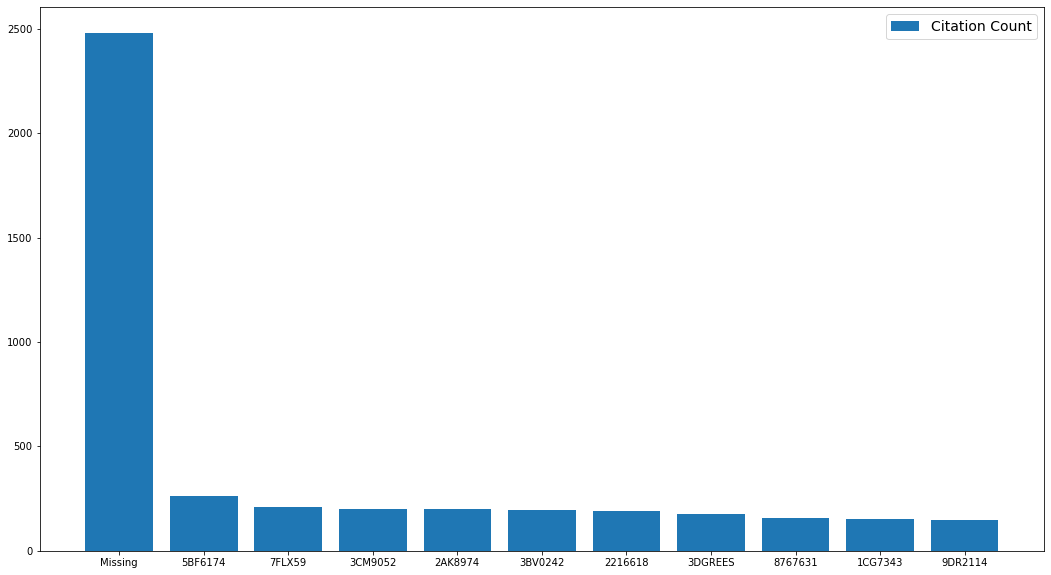

In [34]:
plt.figure(figsize = (18,10))

plt.bar(x.loc[0:10, 'Tag'], x.loc[0:10, 'Count'], label = 'Citation Count')
plt.legend(loc='upper right', fontsize = 14)

plt.show()

In [35]:
def pick_colors_according_to_mean_count(this_data):
    colors = []
    avg = this_data.Count.mean()
    for each in this_data.Count:
        if each > avg*1.01:
            colors.append('lightcoral')
        elif each < avg*0.99:
            colors.append('green')
        else:
            colors.append('black')
    return colors

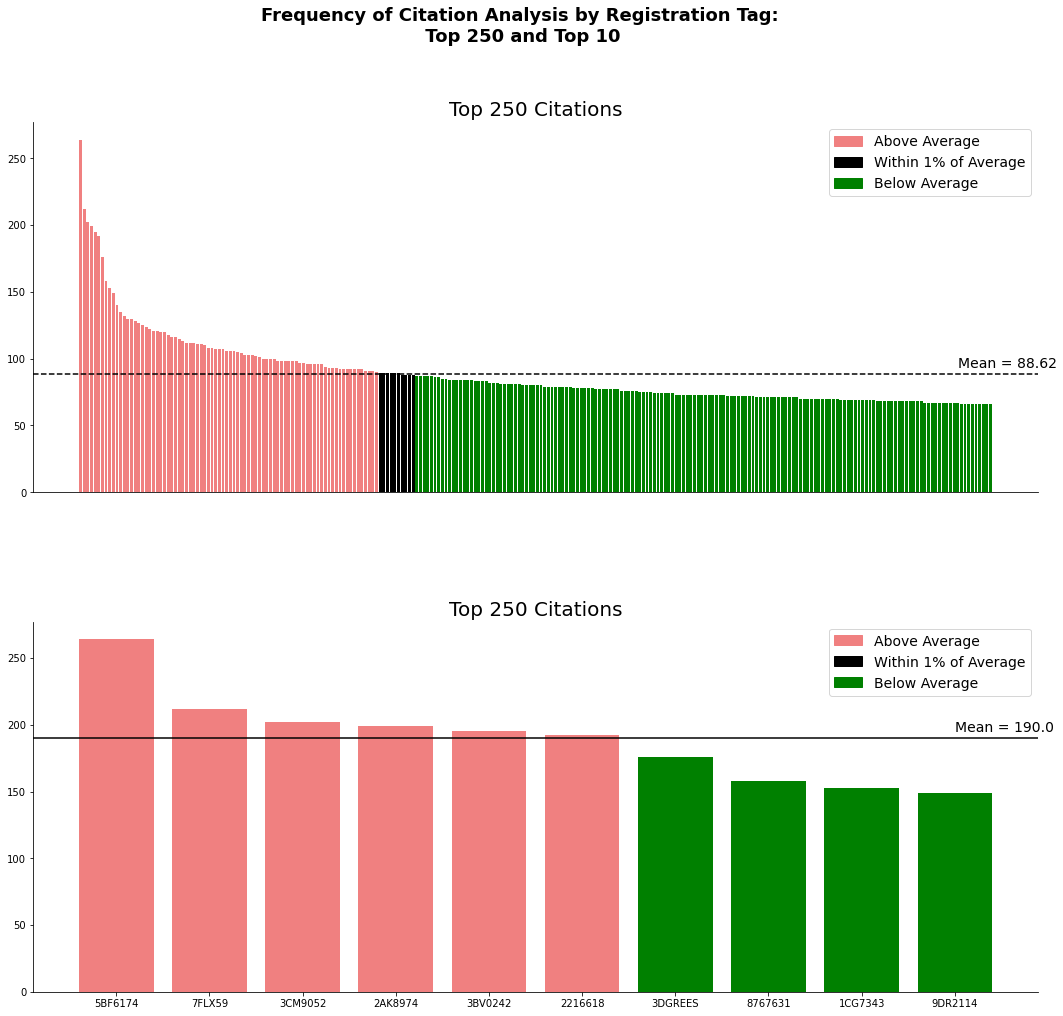

In [50]:
import matplotlib.patches as mpatches


bottom1 = 1
top1 = 250
d1 = x.loc[bottom1:top1]
my_colors1 = pick_colors_according_to_mean_count(d1)

bottom2 = 1
top2 = 10
d2 = x.loc[bottom2:top2]
my_colors2 = pick_colors_according_to_mean_count(d2)

Above = mpatches.Patch(color = 'lightcoral', label = 'Above Average')
At = mpatches.Patch(color = 'black', label = 'Within 1% of Average')
Below = mpatches.Patch(color = 'green', label = 'Below Average')

fig = plt.figure(figsize = (18,16))
fig.suptitle('Frequency of Citation Analysis by Registration Tag:\n Top ' + str(top1) + ' and Top '+ str(top2),fontsize = 18, fontweight = 'bold')

ax1 = fig.add_subplot(2, 1, 1)
ax1.bar(d1.Tag, d1.Count, label = 'Count', color = my_colors1)
#ax1.legend(fontsize = 14)
ax1.legend(handles = [Above, At, Below],fontsize = 14)
plt.axhline(d1.Count.mean(), color = 'black', linestyle = 'dashed')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.axes.xaxis.set_visible(False)
ax1.set_title('Top '+ str(top1) +' Citations', size = 20)
ax1.text(top1-10, d1.Count.mean()+5, 'Mean = ' + str(d1.Count.mean()), rotation = 0, fontsize = 14)

ax2 = fig.add_subplot(2, 1, 2)
ax2.bar(d2.Tag, d2.Count, label = 'Count', color = my_colors2)
#ax1.legend(fontsize = 14)
ax2.legend(handles = [Above, At, Below],fontsize = 14)
plt.axhline(d2.Count.mean(), color = 'black', linestyle = 'solid')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
#ax2.axes.xaxis.set_visible(False)
ax2.set_title('Top '+ str(top1) +' Citations', size = 20)
ax2.text(top2-1, d2.Count.mean()+5, 'Mean = ' + str(d2.Count.mean()), rotation = 0, fontsize = 14)

fig.subplots_adjust(hspace = 0.35)

plt.show()

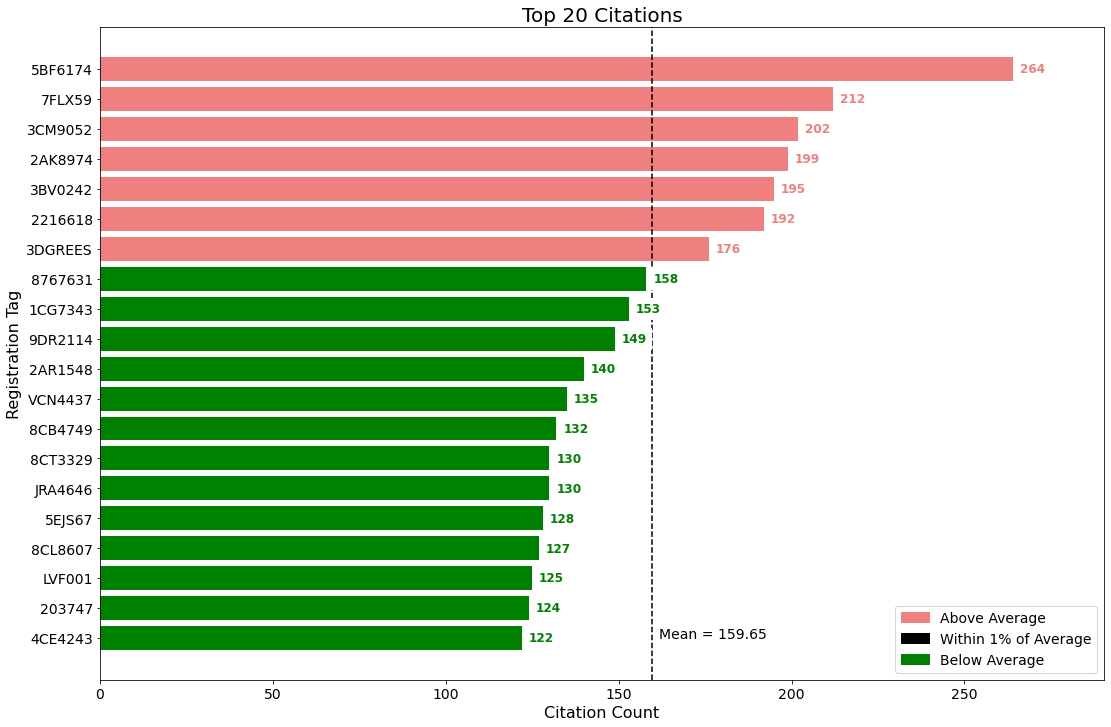

In [59]:
bottom3 = 1
top3    = 20
d3 = x.loc[bottom3:top3]
d3 = d3.sort_values('Count', ascending = True)
d3.reset_index(inplace = True, drop = True)
my_colors3 = pick_colors_according_to_mean_count(d3)

Above = mpatches.Patch(color = 'lightcoral', label = 'Above Average')
At = mpatches.Patch(color = 'black', label = 'Within 1% of Average')
Below = mpatches.Patch(color = 'green', label = 'Below Average')

fig = plt.figure(figsize = (18, 12))
ax1 = fig.add_subplot(1, 1, 1)
ax1.barh(d3.Tag, d3.Count, color = my_colors3)

for row_counter, value_at_row_counter in enumerate(d3.Count):
    if value_at_row_counter > d3.Count.mean()*1.01:
        color = 'lightcoral'
    elif value_at_row_counter < d3.Count.mean()*0.99:
        color = 'green'
    else:
        color = 'black'
    ax1.text(value_at_row_counter+2, row_counter, str(value_at_row_counter), color = color, size = 12, fontweight = 'bold',
            ha = 'left', va ='center', backgroundcolor = 'white')
plt.xlim(0, d3.Count.max()*1.1)

ax1.legend(loc='lower right', handles = [Above, At, Below], fontsize = 14)
plt.axvline(d3.Count.mean(),color = 'black', linestyle = 'dashed')
ax1.text(d3.Count.mean()+2, 0, 'Mean = ' + str(d3.Count.mean()), rotation = 0, fontsize = 14)

ax1.set_title('Top ' + str(top3) + ' Citations', size = 20)
ax1.set_xlabel('Citation Count', fontsize = 16)
ax1.set_ylabel('Registration Tag', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

In [74]:
def autolabel(these_bars, this_ax, place_of_decimals, symbol):
    for each_bar in these_bars:
        height = each_bar.get_height()
        this_ax.text(each_bar.get_x()+each_bar.get_width()/2, height*1.01, symbol+format(height,place_of_decimals),
                    fontsize = 12, color = 'black', ha = 'center', va = 'bottom')

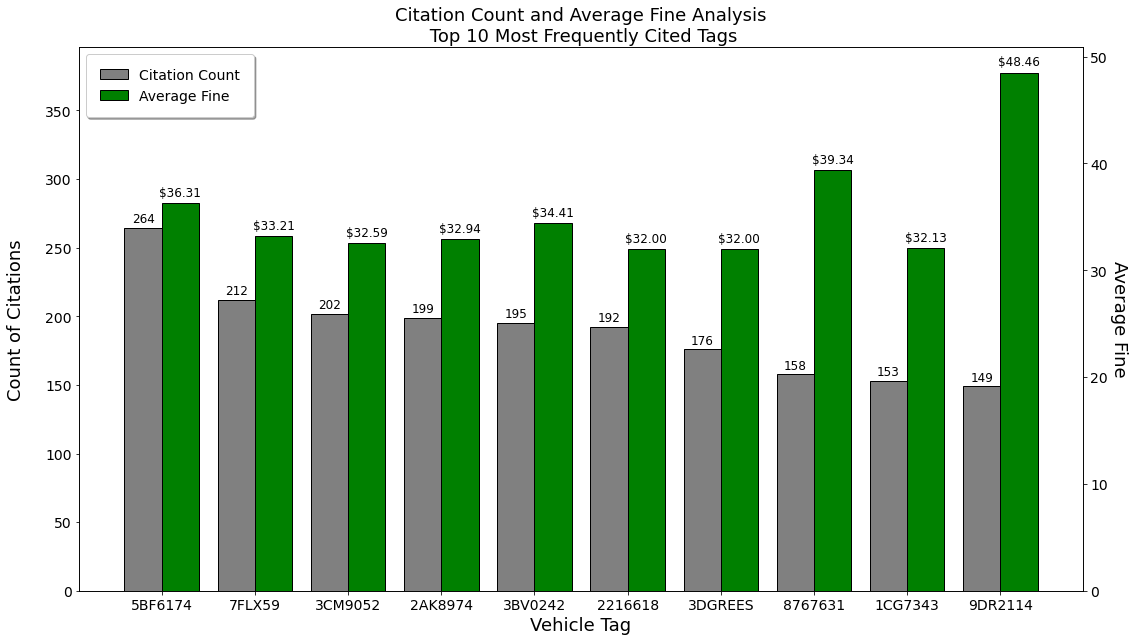

In [75]:
# remember from an earlier visualization that we had set d2 = x.loc[1:10]

fig = plt.figure(figsize = (18,10))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()
bar_width = 0.4

x_pos = np.arange(10)
count_bars = ax1.bar(x_pos-(0.5*bar_width), d2.Count, bar_width, color = 'gray',edgecolor = 'black', label = 'Citation Count')
aver_fine_bars = ax2.bar(x_pos+(0.5*bar_width), d2.AverFine, bar_width, color = 'green', edgecolor = 'black', label = 'Average Fine')

ax1.set_xlabel('Vehicle Tag', fontsize = 18)
ax1.set_ylabel('Count of Citations', fontsize = 18, labelpad = 20)
ax2.set_ylabel('Average Fine', fontsize = 18, rotation = 270, labelpad = 20)
ax1.tick_params(axis = 'y', labelsize = 14)
ax2.tick_params(axis = 'y', labelsize = 14)

plt.title('Citation Count and Average Fine Analysis\n Top 10 Most Frequently Cited Tags', fontsize = 18)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(d2.Tag, fontsize = 14)

count_color, count_label = ax1.get_legend_handles_labels()
fine_color, fine_label   = ax2.get_legend_handles_labels()
legend = ax1.legend(count_color + fine_color, count_label + fine_label, loc = 'upper left', frameon = True, ncol = 1, shadow = True,
                   borderpad = 1, fontsize = 14)
ax1.set_ylim(0, d2.Count.max()*1.5)

autolabel(count_bars, ax1, '.0f', '')
autolabel(aver_fine_bars, ax2, '.2f', '$')

plt.show()